# Read me

If you want to start with pre-filtered data set, start with import section and then skip everything until "3. Starting point". Start from there

# 0. Import section

In [2]:
import pandas as pd
import math
import time
import os

# 1. Cleaning big data set

In [3]:
newspaper_df = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newspaper_data.csv')
newspaper_df.head()

KeyboardInterrupt: 

In [ ]:
#give me the shape of newspaper_df
newspaper_df.shape

(2688878, 10)

In [ ]:
#give me the different potential values for the column publication
print(newspaper_df['publication'].unique())
len(newspaper_df['publication'].unique())

['Vox' 'Business Insider' 'Reuters' 'TMZ' 'Vice' 'Vice News'
 'Hyperallergic' 'TechCrunch' 'Axios' 'Refinery 29' 'The Verge' 'Mashable'
 'People' 'Economist' 'CNN' 'Gizmodo' 'New Yorker' 'CNBC' 'Wired'
 'New Republic' 'Fox News' 'The Hill' 'Politico' 'The New York Times'
 'Buzzfeed News' 'Washington Post' nan]


27

In [ ]:
#show me the distribution of the column over gteh different values for publication
newspaper_df['publication'].value_counts()

Reuters               840094
The New York Times    252259
CNBC                  238096
The Hill              208411
People                136488
CNN                   127602
Refinery 29           111433
Vice                  101137
Mashable               94107
Business Insider       57953
The Verge              52424
TechCrunch             52095
TMZ                    49595
Axios                  47815
Vox                    47272
Politico               46377
Washington Post        40882
Buzzfeed News          32819
Gizmodo                27228
Economist              26227
Wired                  20243
Fox News               20144
Vice News              15539
Hyperallergic          13551
New Republic           11809
New Yorker              4701
Name: publication, dtype: int64

In [ ]:
relevant = ['TMZ', 'Economist', 'CNN', 'CNBC', 'Fox News', 'Reuters', 'The New York Times','Washington Post', 'Business Insider']

In [ ]:
columns_to_keep = ['year', 'title', 'article', 'publication']

In [ ]:
#create new data frame that is reduced to the relevant publications and columns to keep
newspaper_df = newspaper_df[newspaper_df['publication'].isin(relevant)][columns_to_keep]

# 2. EDA of cleaned data set

# 3 Starting point

# 4 Embeddings

## 4.1 Bag of words 

In [ ]:
def bow (df,column):
    vect_bow = CountVectorizer()
    vect_bow.fit(df[column])
    bow_matrix = vect_bow.transform(df[column])
    return bow_matrix, bow_matrix.shape

bow(df, "article")

In [ ]:
# Get the unique values in the bow_matrix
unique_values = np.unique(bow_matrix.data)

# Print the unique values
print(unique_values)

In [ ]:
vocabulary = vect_bow.get_feature_names_out()

# Find the words with the desired count
target_count = 189
target_words = [word for word, count in zip(vocabulary, bow_matrix.sum(axis=0).tolist()[0]) if count == target_count]

# Print the words
print(target_words)

## 4.2 Word2Vec

In [ ]:
def selfword2vec (df, column, word):
    # Prepare the data for training the Word2Vec model
    sentences = [article.split() for article in df[column]]
    
    # Train the Word2Vec model
    word2vec_df = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    
    # Get the word vector for a specific word
    word_vector = word2vec_df.wv[word]

    # Find similar words to a given word
    similar_words = word2vec_df.wv.most_similar(word, topn=5)

    print(similar_words)
    return word2vec_df

selfword2vec(df, "article", "contract")

#eotf2vec_df is the word2vec model that can be used for further steps

## 3.1 Reading in

In [ ]:
#create a list with the names of the files
file_names = ['newsdata_1.csv', 'newsdata_2.csv', 'newsdata_3.csv', 'newsdata_4.csv', 'newsdata_5.csv', 'newsdata_6.csv', 'newsdata_7.csv', 'newsdata_8.csv', 'newsdata_9.csv', 'newsdata_10.csv', 'newsdata_11.csv', 'newsdata_12.csv', 'newsdata_13.csv', 'newsdata_14.csv', 'newsdata_15.csv', 'newsdata_16.csv', 'newsdata_17.csv', 'newsdata_18.csv', 'newsdata_19.csv', 'newsdata_20.csv', 'newsdata_21.csv', 'newsdata_22.csv', 'newsdata_23.csv', 'newsdata_24.csv', 'newsdata_25.csv', 'newsdata_26.csv', 'newsdata_27.csv', 'newsdata_28.csv', 'newsdata_29.csv', 'newsdata_30.csv', 'newsdata_31.csv', 'newsdata_32.csv', 'newsdata_33.csv', 'newsdata_34.csv', 'newsdata_35.csv', 'newsdata_36.csv', 'newsdata_37.csv', 'newsdata_38.csv', 'newsdata_39.csv', 'newsdata_40.csv', 'newsdata_41.csv', 'newsdata_42.csv', 'newsdata_43.csv', 'newsdata_44.csv', 'newsdata_45.csv', 'newsdata_46.csv', 'newsdata_47.csv', 'newsdata_48.csv', 'newsdata_49.csv', 'newsdata_50.csv', 'newsdata_51.csv', 'newsdata_52.csv', 'newsdata_53.csv', 'newsdata_54.csv', 'newsdata_55.csv', 'newsdata_56.csv', 'newsdata_57.csv', 'newsdata_58.csv', 'newsdata_59.csv', 'newsdata_60.csv', 'newsdata_61.csv', 'newsdata_62.csv', 'newsdata_63.csv', 'newsdata_64.csv', 'newsdata_65.csv', 'newsdata_66.csv', 'newsdata_67.csv', 'newsdata_68.csv', 'newsdata_69.csv', 'newsdata_70.csv', 'newsdata_71.csv',
'newsdata_72.csv', 'newsdata_73.csv', 'newsdata_74.csv', 'newsdata_75.csv', 'newsdata_76.csv', 'newsdata_77.csv', 'newsdata_78.csv', 'newsdata_79.csv', 'newsdata_80.csv', 'newsdata_81.csv', 'newsdata_82.csv', 'newsdata_83.csv', 'newsdata_84.csv', 'newsdata_85.csv', 'newsdata_86.csv', 'newsdata_87.csv', 'newsdata_88.csv', 'newsdata_89.csv', 'newsdata_90.csv', 'newsdata_91.csv', 'newsdata_92.csv', 'newsdata_93.csv', 'newsdata_94.csv', 'newsdata_95.csv', 'newsdata_96.csv', 'newsdata_97.csv', 'newsdata_98.csv', 'newsdata_99.csv', 'newsdata_100.csv', 'newsdata_101.csv', 'newsdata_102.csv', 'newsdata_103.csv', 'newsdata_104.csv', 'newsdata_105.csv', 'newsdata_106.csv', 'newsdata_107.csv', 'newsdata_108.csv', 'newsdata_109.csv', 'newsdata_110.csv', 'newsdata_111.csv', 'newsdata_112.csv', 'newsdata_113.csv', 'newsdata_114.csv', 'newsdata_115.csv', 'newsdata_116.csv', 'newsdata_117.csv', 'newsdata_118.csv', 'newsdata_119.csv', 'newsdata_120.csv', 'newsdata_121.csv', 'newsdata_122.csv', 'newsdata_123.csv', 'newsdata_124.csv', 'newsdata_125.csv', 'newsdata_126.csv', 'newsdata_127.csv', 'newsdata_128.csv', 'newsdata_129.csv', 'newsdata_130.csv', 'newsdata_131.csv', 'newsdata_132.csv', 'newsdata_133.csv', 'newsdata_134.csv', 'newsdata_135.csv', 'newsdata_136.csv', 'newsdata_137.csv', 'newsdata_138.csv', 'newsdata_139.csv', 'newsdata_140.csv', 'newsdata_141.csv', 'newsdata_142.csv',
'newsdata_143.csv', 'newsdata_144.csv', 'newsdata_145.csv', 'newsdata_146.csv', 'newsdata_147.csv', 'newsdata_148.csv', 'newsdata_149.csv', 'newsdata_150.csv', 'newsdata_151.csv', 'newsdata_152.csv', 'newsdata_153.csv', 'newsdata_154.csv', 'newsdata_155.csv', 'newsdata_156.csv', 'newsdata_157.csv', 'newsdata_158.csv', 'newsdata_159.csv', 'newsdata_160.csv', 'newsdata_161.csv', 'newsdata_162.csv', 'newsdata_163.csv', 'newsdata_164.csv', 'newsdata_165.csv', 'newsdata_166.csv', 'newsdata_167.csv', 'newsdata_168.csv', 'newsdata_169.csv', 'newsdata_170.csv', 'newsdata_171.csv', 'newsdata_172.csv', 'newsdata_173.csv', 'newsdata_174.csv', 'newsdata_175.csv', 'newsdata_176.csv', 'newsdata_177.csv', 'newsdata_178.csv', 'newsdata_179.csv', 'newsdata_180.csv', 'newsdata_181.csv', 'newsdata_182.csv', 'newsdata_183.csv', 'newsdata_184.csv', 'newsdata_185.csv', 'newsdata_186.csv', 'newsdata_187.csv', 'newsdata_188.csv', 'newsdata_189.csv', 'newsdata_190.csv', 'newsdata_191.csv', 'newsdata_192.csv', 'newsdata_193.csv', 'newsdata_194.csv', 'newsdata_195.csv', 'newsdata_196.csv', 'newsdata_197.csv', 'newsdata_198.csv', 'newsdata_199.csv', 'newsdata_200.csv', 'newsdata_201.csv', 'newsdata_202.csv', 'newsdata_203.csv', 'newsdata_204.csv', 'newsdata_205.csv', 'newsdata_206.csv', 'newsdata_207.csv', 'newsdata_208.csv', 'newsdata_209.csv', 'newsdata_210.csv', 'newsdata_211.csv', 'newsdata_212.csv', 'newsdata_213.csv',
'newsdata_214.csv', 'newsdata_215.csv', 'newsdata_216.csv', 'newsdata_217.csv', 'newsdata_218.csv', 'newsdata_219.csv', 'newsdata_220.csv', 'newsdata_221.csv', 'newsdata_222.csv', 'newsdata_223.csv', 'newsdata_224.csv', 'newsdata_225.csv', 'newsdata_226.csv', 'newsdata_227.csv', 'newsdata_228.csv', 'newsdata_229.csv', 'newsdata_230.csv', 'newsdata_231.csv', 'newsdata_232.csv', 'newsdata_233.csv', 'newsdata_234.csv', 'newsdata_235.csv', 'newsdata_236.csv', 'newsdata_237.csv', 'newsdata_238.csv', 'newsdata_239.csv', 'newsdata_240.csv', 'newsdata_241.csv', 'newsdata_242.csv', 'newsdata_243.csv', 'newsdata_244.csv', 'newsdata_245.csv', 'newsdata_246.csv', 'newsdata_247.csv', 'newsdata_248.csv', 'newsdata_249.csv', 'newsdata_250.csv', 'newsdata_251.csv', 'newsdata_252.csv', 'newsdata_253.csv', 'newsdata_254.csv', 'newsdata_255.csv', 'newsdata_256.csv', 'newsdata_257.csv', 'newsdata_258.csv', 'newsdata_259.csv', 'newsdata_260.csv', 'newsdata_261.csv', 'newsdata_262.csv', 'newsdata_263.csv', 'newsdata_264.csv', 'newsdata_265.csv', 'newsdata_266.csv', 'newsdata_267.csv', 'newsdata_268.csv', 'newsdata_269.csv', 'newsdata_270.csv', 'newsdata_271.csv', 'newsdata_272.csv', 'newsdata_273.csv', 'newsdata_274.csv', 'newsdata_275.csv', 'newsdata_276.csv', 'newsdata_277.csv', 'newsdata_278.csv', 'newsdata_279.csv', 'newsdata_280.csv', 'newsdata_281.csv', 'newsdata_282.csv', 'newsdata_283.csv', 'newsdata_284.csv',
'newsdata_285.csv', 'newsdata_286.csv', 'newsdata_287.csv', 'newsdata_288.csv', 'newsdata_289.csv', 'newsdata_290.csv', 'newsdata_291.csv', 'newsdata_292.csv', 'newsdata_293.csv', 'newsdata_294.csv', 'newsdata_295.csv', 'newsdata_296.csv', 'newsdata_297.csv', 'newsdata_298.csv', 'newsdata_299.csv', 'newsdata_300.csv', 'newsdata_301.csv', 'newsdata_302.csv', 'newsdata_303.csv', 'newsdata_304.csv', 'newsdata_305.csv', 'newsdata_306.csv', 'newsdata_307.csv', 'newsdata_308.csv', 'newsdata_309.csv', 'newsdata_310.csv', 'newsdata_311.csv', 'newsdata_312.csv', 'newsdata_313.csv', 'newsdata_314.csv', 'newsdata_315.csv', 'newsdata_316.csv', 'newsdata_317.csv', 'newsdata_318.csv', 'newsdata_319.csv', 'newsdata_320.csv', 'newsdata_321.csv', 'newsdata_322.csv', 'newsdata_323.csv', 'newsdata_324.csv', 'newsdata_325.csv', 'newsdata_326.csv', 'newsdata_327.csv', 'newsdata_328.csv', 'newsdata_329.csv', 'newsdata_329.csv', 'newsdata_330.csv', 'newsdata_331.csv', 'newsdata_332.csv', 'newsdata_333.csv', 'newsdata_334.csv', 'newsdata_335.csv', 'newsdata_336.csv', 'newsdata_337.csv', 'newsdata_338.csv', 'newsdata_339.csv', 'newsdata_340.csv', 'newsdata_341.csv', 'newsdata_342.csv', 'newsdata_343.csv', 'newsdata_344.csv', 'newsdata_345.csv', 'newsdata_346.csv', 'newsdata_347.csv', 'newsdata_348.csv', 'newsdata_349.csv', 'newsdata_350.csv', 'newsdata_351.csv', 'newsdata_352.csv', 'newsdata_353.csv', 'newsdata_354.csv',
'newsdata_355.csv', 'newsdata_356.csv', 'newsdata_357.csv', 'newsdata_358.csv', 'newsdata_359.csv', 'newsdata_360.csv', 'newsdata_361.csv', 'newsdata_362.csv', 'newsdata_363.csv', 'newsdata_364.csv', 'newsdata_365.csv', 'newsdata_366.csv', 'newsdata_367.csv', 'newsdata_368.csv', 'newsdata_369.csv', 'newsdata_370.csv', 'newsdata_371.csv', 'newsdata_372.csv', 'newsdata_373.csv', 'newsdata_374.csv', 'newsdata_375.csv', 'newsdata_376.csv', 'newsdata_377.csv', 'newsdata_378.csv', 'newsdata_379.csv', 'newsdata_380.csv', 'newsdata_381.csv', 'newsdata_382.csv', 'newsdata_383.csv', 'newsdata_384.csv', 'newsdata_385.csv', 'newsdata_386.csv', 'newsdata_387.csv', 'newsdata_388.csv']

In [ ]:
#add all the files in the list file_names to one new dataframe
df = pd.concat([pd.read_csv(f) for f in file_names ])

In [ ]:
df.shape

(1589892, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589892 entries, 0 to 2004
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1589892 non-null  int64 
 1   title        1589892 non-null  object
 2   article      1589892 non-null  object
 3   publication  1589892 non-null  object
dtypes: int64(1), object(3)
memory usage: 60.6+ MB


In [ ]:
df.head()

,year,title,article,publication
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
1,2018,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters
2,2019,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,Reuters
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...","BERLIN, June 17 (Reuters) - ECB board member B...",Reuters


In [ ]:
#show me the distribution of rows over publications
print(df['publication'].value_counts())
#sum up the number of rows per publication
print(df['publication'].value_counts().sum())

Reuters               825136
The New York Times    249072
CNBC                  234139
CNN                   125300
Business Insider       55588
TMZ                    49504
Economist              23200
Fox News               20144
Washington Post         3332
Name: publication, dtype: int64
1585415


In [ ]:
#renew the index
df = df.reset_index(drop=True)


In [ ]:
df.tail()

,year,title,article,publication
1585410,2020,Florida Ammo Selling Out On Heels of Stay-At-H...,Florida residents are gunning for all the ammo...,TMZ
1585411,2020,Disney Forcing Annual Pass Holders to Continue...,Disney isn't letting its most loyal customers ...,TMZ
1585412,2020,Nick Cannon Pimps Out His Impala with Custom N...,Nick Cannon still has Nipsey Hussle in his tho...,TMZ
1585413,2020,Pete Buttigieg Says Governors Showing More Lea...,Pete Buttigieg says it's inspiring to see the ...,TMZ
1585414,2020,Ruth Bader Ginsburg Still Working Out with Tra...,Here's some good news we can all use ... Ruth ...,TMZ


## 3.2 Cleaning

In [ ]:
# Function for Cleaning text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Tokenize the article into words
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens 
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a cleaned article
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
# Cleaning the text
df['content'] = df['content'].apply(clean)

In [ ]:
df.head()

## 2.1 General information

In [ ]:
newspaper_df.head()

,year,title,article,publication
1,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
2,2018,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters
3,2019,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,Reuters
4,2016,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
5,2019,"ECB's Coeure: If we decide to cut rates, we'd ...","BERLIN, June 17 (Reuters) - ECB board member B...",Reuters


In [ ]:
newspaper_df.shape

(1652852, 4)

In [ ]:
newspaper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652852 entries, 1 to 2688877
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1652852 non-null  int64 
 1   title        1652816 non-null  object
 2   article      1587777 non-null  object
 3   publication  1652852 non-null  object
dtypes: int64(1), object(3)
memory usage: 63.1+ MB


In [ ]:
newspaper_df.isnull().sum()

year               0
title             36
article        65075
publication        0
dtype: int64

In [ ]:
#show me the distribution of isnull in article over publication
newspaper_df[newspaper_df['article'].isnull()]['publication'].value_counts()

Washington Post       37550
Reuters               14958
CNBC                   3955
The New York Times     3173
Economist              3027
CNN                    2302
TMZ                      91
Business Insider         19
Name: publication, dtype: int64

In [ ]:
#delete all rows where article and title is null
newspaper_df = newspaper_df.dropna(subset=['article', 'title'])

In [ ]:
#show me the distribution of the column over the different values for publication
newspaper_df['publication'].value_counts()


Reuters               825136
The New York Times    249072
CNBC                  234139
CNN                   125300
Business Insider       57934
TMZ                    49504
Economist              23200
Fox News               20144
Washington Post         3332
Name: publication, dtype: int64

In [ ]:
newspaper_df.shape

(1587761, 4)

## 2.2 Plots

<AxesSubplot: >

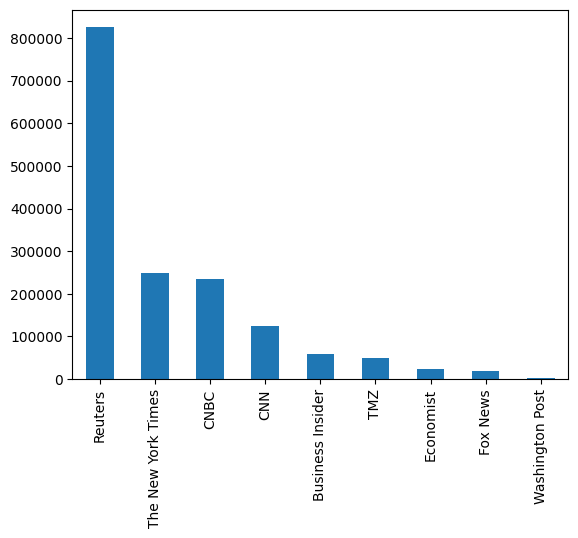

In [ ]:
#plot the distribution of the column over the different values for publication
newspaper_df['publication'].value_counts().plot(kind='bar')

<AxesSubplot: >

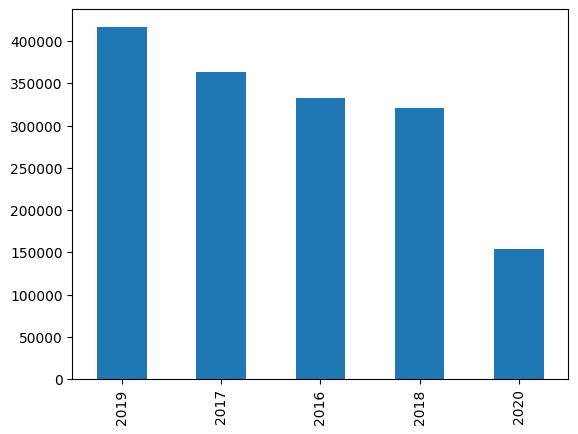

In [ ]:
#plot the articles per year
newspaper_df['year'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='year'>

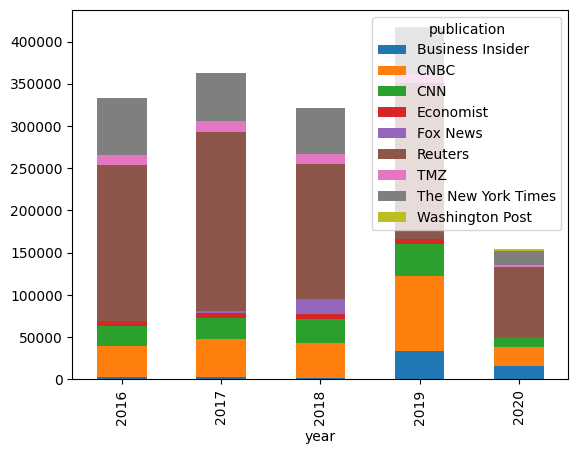

In [ ]:
#plot the articles per year per publication
newspaper_df.groupby(['year', 'publication']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='year'>

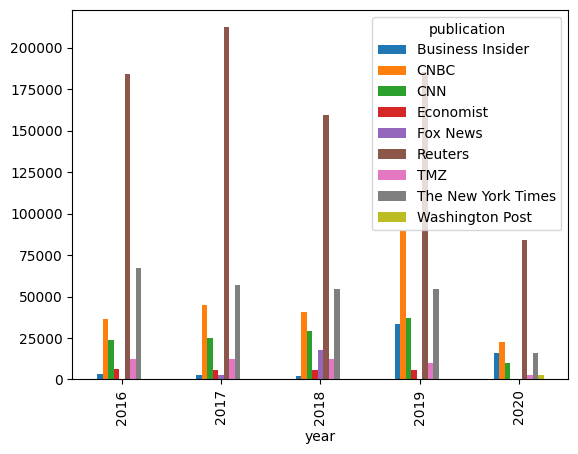

In [ ]:
#plot the articles per year per publication
newspaper_df.groupby(['year', 'publication']).size().unstack().plot(kind='bar', stacked=False)

## 2.3 Saving shorter df as csv

In [26]:
import time
import math

In [42]:
def split_dataframe(df, max_file_size_mb, file_name):
    # Start the timer
    start_time = time.time()

    max_file_size_bytes = max_file_size_mb * 1024 * 1024

    # Split the DataFrame into sub DataFrames
    num_files = math.ceil(len(df) / max_file_size_bytes)
    print(f'num_files: {num_files}')

    # Split the DataFrame and save each sub DataFrame as a CSV file
    sub_dfs = []
    for i in range(num_files):
        start_index = i * max_file_size_bytes
        end_index = min((i + 1) * max_file_size_bytes, len(df))
        sub_df = df.iloc[start_index:end_index]
        sub_dfs.append(sub_df)

        # Save each sub DataFrame as a CSV file with the specified name and a number
        file_path = f'{file_name}_{i + 1}.csv'
        sub_df.to_csv(file_path, index=False)

    # Stop the timer
    end_time = time.time()
    print(f'Finished splitting {len(df)} rows into {num_files} files in {end_time - start_time:.2f} seconds')

    # Return the list of sub DataFrames
    return sub_dfs

In [23]:
def split_dataframe(df, max_file_size_mb, file_name):
    # Start the timer
    start_time = time.time()

    max_file_size_bytes = max_file_size_mb * 1024 * 1024

    # Calculate the approximate size of each row in bytes
    row_size = df.memory_usage(deep=True).sum() / len(df)

    # Calculate the number of rows that would fit within the maximum file size
    num_rows_per_file = math.floor(max_file_size_bytes / row_size)

    # Split the DataFrame into sub DataFrames
    num_files = math.ceil(len(df) / num_rows_per_file)
    print(f'num_files: {num_files}')

    # Save each sub DataFrame as a CSV file with the specified name and a number
    for i in range(num_files):
        start_index = i * num_rows_per_file
        end_index = min((i + 1) * num_rows_per_file, len(df))
        sub_df = df.iloc[start_index:end_index].copy()
        file_path = f'{file_name}_{i + 1}.csv'
        sub_df.to_csv(file_path, index=False)

    # Stop the timer
    end_time = time.time()
    print(f'Finished splitting {len(df)} rows into {num_files} files in {end_time - start_time:.2f} seconds')

In [70]:
# Split the DataFrame into sub DataFrames with a maximum file size of 249 MB
sub_dataframes = split_dataframe(newspaper_df, 24.9, "newsdata")

num_files: 327
Finished splitting 1587761 rows into 327 files in 193.70 seconds


In [30]:
#read in the newsdata_282.csv and split it into 2 csv files, safe as newsdata_282_1.csv and newsdata_282_2.csv
newsdata_282 = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newsdata_269.csv')
sub_dataframes = split_dataframe(newsdata_282, 24.9, "newsdata_269")


num_files: 3
Finished splitting 4858 rows into 3 files in 0.82 seconds


In [108]:
#read in the newsdata_282.csv and split it into 2 csv files, safe as newsdata_282_1.csv and newsdata_282_2.csv
newsdata_282 = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newsdata_312.csv')
sub_dataframes = split_dataframe(newsdata_282, 24.9, "newsdata_312")

num_files: 3
Finished splitting 4858 rows into 3 files in 3.37 seconds


In [29]:
#read in the newsdata_282.csv and split it into 2 csv files, safe as newsdata_282_1.csv and newsdata_282_2.csv
newsdata_282 = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newsdata_269.csv')
sub_dataframes = split_dataframe(newsdata_282, 24.9, "newsdata_269")

num_files: 3
Finished splitting 4858 rows into 3 files in 0.75 seconds


In [21]:
#create a list with the names of the files
file_names = ['newsdata_1.csv', 'newsdata_2.csv', 'newsdata_3.csv', 'newsdata_4.csv', 'newsdata_5.csv', 'newsdata_6.csv', 'newsdata_7.csv', 'newsdata_8.csv', 'newsdata_9.csv', 'newsdata_10.csv', 'newsdata_11.csv', 'newsdata_12.csv', 'newsdata_13.csv', 'newsdata_14.csv', 'newsdata_15.csv', 'newsdata_16.csv', 'newsdata_17.csv', 'newsdata_18.csv', 'newsdata_19.csv', 'newsdata_20.csv', 'newsdata_21.csv', 'newsdata_22.csv', 'newsdata_23.csv', 'newsdata_24.csv', 'newsdata_25.csv', 'newsdata_26.csv', 'newsdata_27.csv', 'newsdata_28.csv', 'newsdata_29.csv', 'newsdata_30.csv', 'newsdata_31.csv', 'newsdata_32.csv', 'newsdata_33.csv', 'newsdata_34.csv', 'newsdata_35.csv', 'newsdata_36.csv', 'newsdata_37.csv', 'newsdata_38.csv', 'newsdata_39.csv', 'newsdata_40.csv', 'newsdata_41.csv', 'newsdata_42.csv', 'newsdata_43.csv', 'newsdata_44.csv', 'newsdata_45.csv', 'newsdata_46.csv', 'newsdata_47.csv', 'newsdata_48.csv', 'newsdata_49.csv', 'newsdata_50.csv', 'newsdata_51.csv', 'newsdata_52.csv', 'newsdata_53.csv', 'newsdata_54.csv', 'newsdata_55.csv', 'newsdata_56.csv', 'newsdata_57.csv', 'newsdata_58.csv', 'newsdata_59.csv', 'newsdata_60.csv', 'newsdata_61.csv', 'newsdata_62.csv', 'newsdata_63.csv', 'newsdata_64.csv', 'newsdata_65.csv', 'newsdata_66.csv', 'newsdata_67.csv', 'newsdata_68.csv', 'newsdata_69.csv', 'newsdata_70.csv', 'newsdata_71.csv',
'newsdata_72.csv', 'newsdata_73.csv', 'newsdata_74.csv', 'newsdata_75.csv', 'newsdata_76.csv', 'newsdata_77.csv', 'newsdata_78.csv', 'newsdata_79.csv', 'newsdata_80.csv', 'newsdata_81.csv', 'newsdata_82.csv', 'newsdata_83.csv', 'newsdata_84.csv', 'newsdata_85.csv', 'newsdata_86.csv', 'newsdata_87.csv', 'newsdata_88.csv', 'newsdata_89.csv', 'newsdata_90.csv', 'newsdata_91.csv', 'newsdata_92.csv', 'newsdata_93.csv', 'newsdata_94.csv', 'newsdata_95.csv', 'newsdata_96.csv', 'newsdata_97.csv', 'newsdata_98.csv', 'newsdata_99.csv', 'newsdata_100.csv', 'newsdata_101.csv', 'newsdata_102.csv', 'newsdata_103.csv', 'newsdata_104.csv', 'newsdata_105.csv', 'newsdata_106.csv', 'newsdata_107.csv', 'newsdata_108.csv', 'newsdata_109.csv', 'newsdata_110.csv', 'newsdata_111.csv', 'newsdata_112.csv', 'newsdata_113.csv', 'newsdata_114.csv', 'newsdata_115.csv', 'newsdata_116.csv', 'newsdata_117.csv', 'newsdata_118.csv', 'newsdata_119.csv', 'newsdata_120.csv', 'newsdata_121.csv', 'newsdata_122.csv', 'newsdata_123.csv', 'newsdata_124.csv', 'newsdata_125.csv', 'newsdata_126.csv', 'newsdata_127.csv', 'newsdata_128.csv', 'newsdata_129.csv', 'newsdata_130.csv', 'newsdata_131.csv', 'newsdata_132.csv', 'newsdata_133.csv', 'newsdata_134.csv', 'newsdata_135.csv', 'newsdata_136.csv', 'newsdata_137.csv', 'newsdata_138.csv', 'newsdata_139.csv', 'newsdata_140.csv', 'newsdata_141.csv', 'newsdata_142.csv',
'newsdata_143.csv', 'newsdata_144.csv', 'newsdata_145.csv', 'newsdata_146.csv', 'newsdata_147.csv', 'newsdata_148.csv', 'newsdata_149.csv', 'newsdata_150.csv', 'newsdata_151.csv', 'newsdata_152.csv', 'newsdata_153.csv', 'newsdata_154.csv', 'newsdata_155.csv', 'newsdata_156.csv', 'newsdata_157.csv', 'newsdata_158.csv', 'newsdata_159.csv', 'newsdata_160.csv', 'newsdata_161.csv', 'newsdata_162.csv', 'newsdata_163.csv', 'newsdata_164.csv', 'newsdata_165.csv', 'newsdata_166.csv', 'newsdata_167.csv', 'newsdata_168.csv', 'newsdata_169.csv', 'newsdata_170.csv', 'newsdata_171.csv', 'newsdata_172.csv', 'newsdata_173.csv', 'newsdata_174.csv', 'newsdata_175.csv', 'newsdata_176.csv', 'newsdata_177.csv', 'newsdata_178.csv', 'newsdata_179.csv', 'newsdata_180.csv', 'newsdata_181.csv', 'newsdata_182.csv', 'newsdata_183.csv', 'newsdata_184.csv', 'newsdata_185.csv', 'newsdata_186.csv', 'newsdata_187.csv', 'newsdata_188.csv', 'newsdata_189.csv', 'newsdata_190.csv', 'newsdata_191.csv', 'newsdata_192.csv', 'newsdata_193.csv', 'newsdata_194.csv', 'newsdata_195.csv', 'newsdata_196.csv', 'newsdata_197.csv', 'newsdata_198.csv', 'newsdata_199.csv', 'newsdata_200.csv', 'newsdata_201.csv', 'newsdata_202.csv', 'newsdata_203.csv', 'newsdata_204.csv', 'newsdata_205.csv', 'newsdata_206.csv', 'newsdata_207.csv', 'newsdata_208.csv', 'newsdata_209.csv', 'newsdata_210.csv', 'newsdata_211.csv', 'newsdata_212.csv', 'newsdata_213.csv',
'newsdata_214.csv', 'newsdata_215.csv', 'newsdata_216.csv', 'newsdata_217.csv', 'newsdata_218.csv', 'newsdata_219.csv', 'newsdata_220.csv', 'newsdata_221.csv', 'newsdata_222.csv', 'newsdata_223.csv', 'newsdata_224.csv', 'newsdata_225.csv', 'newsdata_226.csv', 'newsdata_227.csv', 'newsdata_228.csv', 'newsdata_229.csv', 'newsdata_230.csv', 'newsdata_231.csv', 'newsdata_232.csv', 'newsdata_233.csv', 'newsdata_234.csv', 'newsdata_235.csv', 'newsdata_236.csv', 'newsdata_237.csv', 'newsdata_238.csv', 'newsdata_239.csv', 'newsdata_240.csv', 'newsdata_241.csv', 'newsdata_242.csv', 'newsdata_243.csv', 'newsdata_244.csv', 'newsdata_245.csv', 'newsdata_246.csv', 'newsdata_247.csv', 'newsdata_248.csv', 'newsdata_249.csv', 'newsdata_250.csv', 'newsdata_251.csv', 'newsdata_252.csv', 'newsdata_253.csv', 'newsdata_254.csv', 'newsdata_255.csv', 'newsdata_256.csv', 'newsdata_257.csv', 'newsdata_258.csv', 'newsdata_259.csv', 'newsdata_260.csv', 'newsdata_261.csv', 'newsdata_262.csv', 'newsdata_263.csv', 'newsdata_264.csv', 'newsdata_265.csv', 'newsdata_266.csv', 'newsdata_267.csv', 'newsdata_268.csv', 'newsdata_269.csv', 'newsdata_270.csv', 'newsdata_271.csv', 'newsdata_272.csv', 'newsdata_273.csv', 'newsdata_274.csv', 'newsdata_275.csv', 'newsdata_276.csv', 'newsdata_277.csv', 'newsdata_278.csv', 'newsdata_279.csv', 'newsdata_280.csv', 'newsdata_281.csv', 'newsdata_282.csv', 'newsdata_283.csv', 'newsdata_284.csv',
'newsdata_285.csv', 'newsdata_286.csv', 'newsdata_287.csv', 'newsdata_288.csv', 'newsdata_289.csv', 'newsdata_290.csv', 'newsdata_291.csv', 'newsdata_292.csv', 'newsdata_293.csv', 'newsdata_294.csv', 'newsdata_295.csv', 'newsdata_296.csv', 'newsdata_297.csv', 'newsdata_298.csv', 'newsdata_299.csv', 'newsdata_300.csv', 'newsdata_301.csv', 'newsdata_302.csv', 'newsdata_303.csv', 'newsdata_304.csv', 'newsdata_305.csv', 'newsdata_306.csv', 'newsdata_307.csv', 'newsdata_308.csv', 'newsdata_309.csv', 'newsdata_310.csv', 'newsdata_311.csv', 'newsdata_312.csv', 'newsdata_313.csv', 'newsdata_314.csv', 'newsdata_315.csv', 'newsdata_316.csv', 'newsdata_317.csv', 'newsdata_318.csv', 'newsdata_319.csv', 'newsdata_320.csv', 'newsdata_321.csv', 'newsdata_322.csv', 'newsdata_323.csv', 'newsdata_324.csv', 'newsdata_325.csv', 'newsdata_326.csv', 'newsdata_327.csv', 'newsdata_328.csv', 'newsdata_329.csv', 'newsdata_329.csv', 'newsdata_330.csv', 'newsdata_331.csv', 'newsdata_332.csv', 'newsdata_333.csv', 'newsdata_334.csv', 'newsdata_335.csv', 'newsdata_336.csv', 'newsdata_337.csv', 'newsdata_338.csv', 'newsdata_339.csv', 'newsdata_340.csv', 'newsdata_341.csv', 'newsdata_342.csv', 'newsdata_343.csv', 'newsdata_344.csv', 'newsdata_345.csv', 'newsdata_346.csv', 'newsdata_347.csv', 'newsdata_348.csv', 'newsdata_349.csv', 'newsdata_350.csv', 'newsdata_351.csv', 'newsdata_352.csv', 'newsdata_353.csv', 'newsdata_354.csv',
'newsdata_355.csv', 'newsdata_356.csv', 'newsdata_357.csv', 'newsdata_358.csv', 'newsdata_359.csv', 'newsdata_360.csv', 'newsdata_361.csv', 'newsdata_362.csv', 'newsdata_363.csv', 'newsdata_364.csv', 'newsdata_365.csv', 'newsdata_366.csv', 'newsdata_367.csv', 'newsdata_368.csv', 'newsdata_369.csv', 'newsdata_370.csv', 'newsdata_371.csv', 'newsdata_372.csv', 'newsdata_373.csv', 'newsdata_374.csv', 'newsdata_375.csv', 'newsdata_376.csv', 'newsdata_377.csv', 'newsdata_378.csv', 'newsdata_379.csv', 'newsdata_380.csv', 'newsdata_381.csv', 'newsdata_382.csv', 'newsdata_383.csv', 'newsdata_384.csv', 'newsdata_385.csv', 'newsdata_386.csv', 'newsdata_387.csv', 'newsdata_388.csv']

In [19]:
folder_path = "files"

# Create an empty dataframe
newspaper_df = pd.DataFrame()

# Create an empty list to store individual dataframes
dfs = []

# Iterate over the file names
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Read each file as a dataframe
    df = pd.read_csv(file_path)  # Modify the read function according to your file format
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate the list of dataframes into a single dataframe
newspaper = pd.concat(dfs, ignore_index=True)

# Print the combined dataframe
print(newspaper_df)

FileNotFoundError: [Errno 2] No such file or directory: 'files/newsdata_229.csv'

In [14]:
#get all the data from the folder "files"
df = pd.concat([pd.read_csv(f) for f in file_names])




FileNotFoundError: [Errno 2] No such file or directory: 'newsdata_1.csv'

#add all the files in the list file_names to one new dataframe
df = pd.concat([pd.read_csv(f) for f in file_names ])

In [9]:
df.shape

(1374009, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374009 entries, 0 to 4857
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1374009 non-null  int64 
 1   title        1374009 non-null  object
 2   article      1374009 non-null  object
 3   publication  1374009 non-null  object
dtypes: int64(1), object(3)
memory usage: 52.4+ MB


In [11]:
df.head()

,year,title,article,publication
0,2019,Redskins CB Norman to remain backup Sunday,Washington Redskins cornerback Josh Norman wil...,Reuters
1,2019,Ethiopia vows to remove barriers to investment...,ADDIS ABABA (Reuters) - Ethiopia vowed on Mond...,Reuters
2,2019,South Korea's November exports to fall for 12t...,SEOUL (Reuters) - South Korea’s exports likely...,Reuters
3,2019,No indication of terrorism in Hague knife atta...,"AMSTERDAM, Nov 29 (Reuters) - Dutch national b...",Reuters
4,2019,Nineteen people killed in bus crash in Russia'...,MOSCOW (Reuters) - Nineteen passengers died wh...,Reuters


In [12]:
#show me the distribution of rows over publications
print(df['publication'].value_counts())
#sum up the number of rows per publication
print(df['publication'].value_counts().sum())

Reuters               797125
CNBC                  219094
CNN                   118833
The New York Times     91993
Business Insider       53173
TMZ                    48028
Economist              22311
Fox News               20144
Washington Post         3308
Name: publication, dtype: int64
1374009


In [13]:
#renew the index
df = df.reset_index(drop=True)


In [14]:
df.tail()

,year,title,article,publication
1374004,2019,Iraq's top Shi'ite cleric condemns protester k...,BAGHDAD (Reuters) - Iraq’s top Shi’ite Muslim ...,Reuters
1374005,2019,Belgian lawyer guilty in 'Catch Me if You Can'...,GENEVA (Reuters) - A Swiss court convicted a B...,Reuters
1374006,2019,Chinese paramilitary conduct anti-terror drill...,BEIJING (Reuters) - Chinese paramilitary troop...,Reuters
1374007,2019,Athletics-New Zealand Olympic star Snell dies ...,Dec 14 (Reuters) - Famed New Zealand Olympic m...,Reuters
1374008,2019,Australian regulator keeps banks' buffer at 0%...,"SYDNEY, Dec 11 (Reuters) - Australia’s bank wa...",Reuters


# Next steps

lets see

1. Topic modelling for all publications as they are currently
2. Decide on best / biggest topic across most publications
3. Pick articles related to topic for further project
-> further reduces amount of articles